In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from google.colab import drive
import math

In [ ]:
drive.mount("/content/drive")
path = "/content/drive/MyDrive"

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/dataset.zip"

Archive:  /content/drive/MyDrive/dataset.zip
  inflating: dataset/tweets.csv      
  inflating: dataset/users.csv       


In [ ]:
df_tweets = pd.read_csv("/content/dataset/tweets.csv")

In [ ]:
df_users = pd.read_csv("/content/dataset/users.csv")

In [ ]:
df_users.head()

,id,name,lang,bot,created_at,statuses_count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


Check if any user record has a null value in it
Extract only record with a null name (id = 1535)

In [ ]:
df_null = df_users.isnull()
idx_null = df_users.index[df_null["name"] == True].tolist()
df_users.iloc[idx_null]

,id,name,lang,bot,created_at,statuses_count
1535,2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


Print info about tweets file

In [ ]:
df_tweets.head()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
2,461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
3,528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
4,575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [ ]:
df_tweets.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              13664694 non-null  object
 1   user_id         13447413 non-null  object
 2   retweet_count   13227562 non-null  object
 3   reply_count     13016818 non-null  object
 4   favorite_count  13017154 non-null  object
 5   num_hashtags    12607172 non-null  object
 6   num_urls        13016073 non-null  object
 7   num_mentions    12810531 non-null  object
 8   created_at      13664696 non-null  object
 9   text            13126975 non-null  object
dtypes: object(10)
memory usage: 1.0+ GB


In [ ]:
df_tweets.size

136646960

## Verifica esistenza record duplicati

In [ ]:
df_tweets_dupl = df_tweets.duplicated()
df_tweets_dupl.value_counts()

False    11712597
True      1952099
dtype: int64

## Drop duplicates

In [ ]:
df_tweets_clear = df_tweets.drop_duplicates(keep = 'first')
df_tweets_clear.shape[0]

11712597

In [ ]:
df_tweets_clear.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712597 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              11712595 non-null  object
 1   user_id         11495314 non-null  object
 2   retweet_count   11275463 non-null  object
 3   reply_count     11064719 non-null  object
 4   favorite_count  11065055 non-null  object
 5   num_hashtags    10655073 non-null  object
 6   num_urls        11063974 non-null  object
 7   num_mentions    10858432 non-null  object
 8   created_at      11712597 non-null  object
 9   text            11182415 non-null  object
dtypes: object(10)
memory usage: 983.0+ MB


## Verifica di duplicati su un sottoinsieme di colonne

In [ ]:
df_tweets_dupl = df_tweets_clear.duplicated(subset=['id']) # Stesso id
df_tweets_dupl.value_counts()

False    11672136
True        40461
dtype: int64

In [ ]:
df_tweets_dupl = df_tweets_clear.duplicated(subset=['id', 'user_id']) # Stesso id e stesso user_id
df_tweets_dupl.value_counts()

False    11712237
True          360
dtype: int64

In [ ]:
df_tweets_dupl = df_tweets_clear.duplicated(subset=['id', 'user_id', 'text']) # Stessi id, user_id e testo
df_tweets_dupl.value_counts()

False    11712336
True          261
dtype: int64

In [ ]:
df_tweets_dupl = df_tweets_clear.duplicated(subset=['id', 'user_id', 'created_at', 'text']) # Stessi id, user_id, testo e data di creazione
df_tweets_dupl.value_counts()

False    11712597
dtype: int64

In [ ]:
df_tweets_dupl =df_tweets_clear[df_tweets_clear.duplicated(subset=['id', 'user_id','text'])]

In [ ]:
df_tweets_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 280761 to 13607558
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              261 non-null    object
 1   user_id         12 non-null     object
 2   retweet_count   142 non-null    object
 3   reply_count     51 non-null     object
 4   favorite_count  76 non-null     object
 5   num_hashtags    0 non-null      object
 6   num_urls        56 non-null     object
 7   num_mentions    0 non-null      object
 8   created_at      261 non-null    object
 9   text            0 non-null      object
dtypes: object(10)
memory usage: 22.4+ KB


## Data la presenza di molteplici valori nulli tra i duplicati secondo le colonne [id, user_id, text] verifichiamo la corrispondenza di tweet con lo user_id non nullo con la tabella users

In [ ]:
df_nonnull_users = df_tweets_dupl[df_tweets_dupl['user_id'].isnull() == False] # Solo 12 user_id sono avvalorati nei duplicati
df_nonnull_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 4515945 to 13484983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              12 non-null     object
 1   user_id         12 non-null     object
 2   retweet_count   5 non-null      object
 3   reply_count     3 non-null      object
 4   favorite_count  2 non-null      object
 5   num_hashtags    0 non-null      object
 6   num_urls        2 non-null      object
 7   num_mentions    0 non-null      object
 8   created_at      12 non-null     object
 9   text            0 non-null      object
dtypes: object(10)
memory usage: 1.0+ KB


In [ ]:
df_nonnull_users.user_id = pd.to_numeric(df_nonnull_users.user_id) # transform column to int values from object
df_nonnull_users.merge(df_users, left_on='user_id', right_on='id') # merge with users table

All users have a correspondance with users in the users file 

## Eliminazione delle righe ripetute secondo il pattern sopracitato aventi lo user_id nullo

In [ ]:
df_tweets_more_clear = df_tweets_clear[df_tweets_clear.duplicated(subset=['id', 'user_id','text'])]

In [ ]:
df_tweets_more_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 280761 to 13607558
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              261 non-null    object
 1   user_id         12 non-null     object
 2   retweet_count   142 non-null    object
 3   reply_count     51 non-null     object
 4   favorite_count  76 non-null     object
 5   num_hashtags    0 non-null      object
 6   num_urls        56 non-null     object
 7   num_mentions    0 non-null      object
 8   created_at      261 non-null    object
 9   text            0 non-null      object
dtypes: object(10)
memory usage: 22.4+ KB


Check null user_id values

In [ ]:
df_tweets_more_clear[df_tweets_more_clear['user_id'].isnull() == True]

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
280761,mxi,NaN,0,NaN,0.0,NaN,1.0,NaN,2019-09-14 20:47:29,NaN
515406,mxi,NaN,2,NaN,0.0,NaN,0.0,NaN,2020-03-22 04:55:02,NaN
573128,srq,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-02-24 22:11:05,NaN
1706009,xiu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-21 14:12:26,NaN
1787554,crks,NaN,0,NaN,NaN,NaN,NaN,NaN,2020-04-17 16:52:26,NaN
...,...,...,...,...,...,...,...,...,...,...
13554922,cxz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-13 07:19:42,NaN
13557755,ngd,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2019-11-01 16:21:42,NaN
13561775,qyt,NaN,0,NaN,0.0,NaN,0.0,NaN,2019-11-03 11:50:00,NaN
13593848,uru,NaN,0,NaN,NaN,NaN,NaN,NaN,2020-03-27 01:57:35,NaN


Drop all records where user_id is null

In [ ]:
df_tweets_single =df_tweets_clear.drop(df_tweets_more_clear[df_tweets_more_clear['user_id'].isnull() == True].index)
df_tweets_single.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712348 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              11712346 non-null  object
 1   user_id         11495314 non-null  object
 2   retweet_count   11275326 non-null  object
 3   reply_count     11064671 non-null  object
 4   favorite_count  11064981 non-null  object
 5   num_hashtags    10655073 non-null  object
 6   num_urls        11063920 non-null  object
 7   num_mentions    10858432 non-null  object
 8   created_at      11712348 non-null  object
 9   text            11182415 non-null  object
dtypes: object(10)
memory usage: 982.9+ MB


Take all users in duplicates that have a user_id that is not null

In [ ]:
df_nonnull_users = df_tweets_dupl[df_tweets_dupl['user_id'].isnull() == False]
df_nonnull_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 4515945 to 13484983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              12 non-null     object
 1   user_id         12 non-null     object
 2   retweet_count   5 non-null      object
 3   reply_count     3 non-null      object
 4   favorite_count  2 non-null      object
 5   num_hashtags    0 non-null      object
 6   num_urls        2 non-null      object
 7   num_mentions    0 non-null      object
 8   created_at      12 non-null     object
 9   text            0 non-null      object
dtypes: object(10)
memory usage: 1.0+ KB


In [ ]:
df_nonnull_users.user_id = pd.to_numeric(df_nonnull_users.user_id) # transform column to int values from object
df_nonnull_users.merge(df_users, left_on='user_id', right_on='id') # merge with users table

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id_x,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at_x,text,id_y,name,lang,bot,created_at_y,statuses_count
0,vada,331806614,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-16 23:49:32,NaN,331806614,Marty Balin,en,1,2016-07-09 19:01:19,12375.0
1,ptb,467116841,0,0.0,0.0,NaN,NaN,NaN,2019-06-17 09:34:56,NaN,467116841,Gabriele Danno,it,1,2017-01-19 04:08:16,61.0
2,efh,1573156616,0,NaN,NaN,NaN,NaN,NaN,2020-03-07 04:35:15,NaN,1573156616,Tiny Tibo,fr,0,2018-07-08 16:27:04,27105.0
3,oby,114910555,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 03:51:40,NaN,114910555,Señor Grande,en,0,2015-02-19 00:51:08,10212.0
4,yfj,2445641666,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-29 23:52:04,NaN,2445641666,Barstool Iowa State,en,0,2019-04-17 15:59:24,1515.0
5,djq,70142270,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-23 12:43:47,NaN,70142270,Morgan Joseph,en,0,2014-09-01 15:31:01,12171.0
6,gnn,24295753,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 15:12:05,NaN,24295753,Nick (Rosie),en,0,2014-03-16 00:53:21,18699.0
7,fkn,1978992043,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-21 23:10:07,NaN,1978992043,-,en-gb,0,2018-10-23 14:43:13,33905.0
8,vam,1499931151,1222,NaN,0.0,NaN,1.0,NaN,2020-03-15 14:54:04,NaN,1499931151,Bojan,en,0,2018-06-13 01:16:32,26559.0
9,tgg,576226470,0,0.0,NaN,NaN,NaN,NaN,2018-11-28 13:28:02,NaN,576226470,Dicerie,en,1,2017-05-12 11:13:08,2000.0


In [ ]:
for attr in ['retweet_count','reply_count','favorite_count','num_hashtags','num_urls','num_mentions']:
    cazzo = df_tweets_single[df_tweets_single.duplicated(subset=['id', 'user_id', 'text', attr])]
    print(attr+'\n'+str(cazzo.shape[0])+'\n')
    #print(cazzo)

retweet_count
7

reply_count
12

favorite_count
12

num_hashtags
12

num_urls
11

num_mentions
12



As this print shows, most of duplicates have missing values. If we exclude `retweet_counts`, the duplicates are the same.

In [ ]:
df_tweets_single[df_tweets_single.duplicated(subset=['id', 'user_id', 'text', 'reply_count','favorite_count','num_hashtags','num_urls','num_mentions'], keep=False)].sort_values(by='id')

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
9354011,djq,70142270,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-23 12:43:47,NaN
7858198,djq,70142270,NaN,NaN,NaN,NaN,0.0,NaN,2019-06-27 13:38:06,NaN
5123152,efh,1573156616,x0c7,NaN,NaN,NaN,NaN,NaN,2020-03-12 02:12:50,NaN
6445718,efh,1573156616,0,NaN,NaN,NaN,NaN,NaN,2020-03-07 04:35:15,NaN
8424121,fkn,1978992043,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-03 16:24:47,NaN
11050094,fkn,1978992043,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-21 23:10:07,NaN
13484983,gaj,251905557,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-25 17:51:35,NaN
13074603,gaj,251905557,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-04 23:35:19,NaN
10231019,gnn,24295753,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 15:12:05,NaN
8474665,gnn,24295753,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-14 00:09:55,NaN


df_tweets_clear = tweets without records which are exact duplicates from all fields
df_tweets_more_clear = df_tweets_clear with duplicates (keep=First) of id, user_id and text
df_tweets_single = df_tweets_clear with some null user_ids dropped

# FINE
From now on we assume that the records in the dataset are not duplcated.

## Users file analysis

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


# Statuses count
Since we have a lot of nulls in the `statuses_count` column, we need to estimate the missing values. The estimate could be computed as the average difference between `statuses_count` and the tweets that we have in the tweets dataset for that user plus the count of the tweets that we have.

In [ ]:
user_ids_with_null_statuses_count = df_users[df_users['statuses_count'].isnull() == True].id.astype(str).tolist()
user_ids_with_null_statuses_count

How many records in the tweets file have user_ids that match the users that have a null status count?

In [ ]:
df_tweets['user_id'].isin(user_ids_with_null_statuses_count).value_counts()

False    13613038
True        51658
Name: user_id, dtype: int64

Select tweets in tweets file which have a user_id which has a null statuses_count in the users file

In [ ]:
tweets_by_user_ids_with_null_statuses_count = df_tweets[df_tweets['user_id'].isin(user_ids_with_null_statuses_count)]

Count how many different tweets (created_at disambiguates this) we have for each user_id

In [ ]:
# it'a series!
tweets_counts_null_statuses = tweets_by_user_ids_with_null_statuses_count.groupby(['user_id']).count()['created_at']

In [ ]:
tweets_counts_null_statuses

user_id
101892747      2
104657589      1
105510200      4
105696650     23
106595346    209
            ... 
716723184     32
72348749     188
759191942      7
80479674      41
951793016     79
Name: created_at, Length: 399, dtype: int64

For users with a non-null statues_count, find the mean and median of this attribute.
As it is possible to see, the mean is probably affected by the presence of a lot of outliers.

In [ ]:
nonnull_users = df_users[df_users['statuses_count'].isnull() == False]
mean_statuses_count = nonnull_users.statuses_count.mean()
median_statuses_count = nonnull_users.statuses_count.median()
print(mean_statuses_count,median_statuses_count)

5883.312359348276 68.0


Plot of statuses_count of users where this value is not null

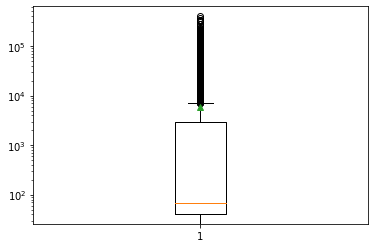

In [ ]:
plt.boxplot(nonnull_users.statuses_count,showmeans=True)
plt.yscale('log')
plt.show()

The boxplot shows that the mean is near the 90th percentile, so we find more reasonable to use the median value to replace the missing values for the `statuses_count` attribute.

--------- NO ---------

In [ ]:
user_ids_with_nonnull_statuses_count = df_users[df_users['statuses_count'].isnull() == False].id.astype(str).tolist()
tweets_by_user_ids_with_nonnull_statuses_count = df_tweets[df_tweets['user_id'].isin(user_ids_with_nonnull_statuses_count)]
tweets_counts_nonnull_statuses = tweets_by_user_ids_with_nonnull_statuses_count.groupby(['user_id']).count()['created_at']

In [ ]:
values = nonnull_users.statuses_count.values - tweets_counts_nonnull_statuses.values
print(np.mean(values), np.median(values))

4697.048609235755 -42.0


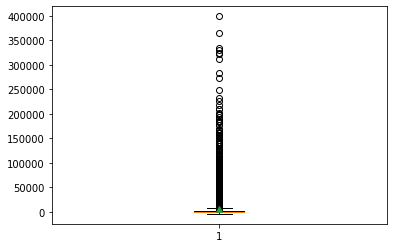

In [ ]:
plt.boxplot(values,showmeans=True)
plt.show()

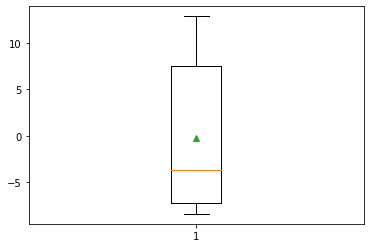

In [ ]:
sign = np.sign(values)
log_values = np.log(np.where(np.abs(values)==0,1e-9, np.abs(values)))
plt.boxplot(sign*log_values,showmeans=True)
plt.show()

In [ ]:
len(values) - np.count_nonzero(values)

20

--------- NO ---------

0   id              11712595 non-null  object
  - MISSING VALUES: ??

1   user_id         11495314 non-null  object
  - MISSING VALUES: ??

2   retweet_count   11275463 non-null  object
  - MISSING VALUES:

3   reply_count     11064719 non-null  object
  - MISSING VALUES:

4   favorite_count  11065055 non-null  object
  - MISSING VALUES:
 
5   num_hashtags    10655073 non-null  object
  - MISSING VALUES:
 
6   num_urls        11063974 non-null  object
  - MISSING VALUES:
 
7   num_mentions    10858432 non-null  object
  - MISSING VALUES:
 
8   created_at      11712597 non-null  object
  - MISSING VALUES: no null values
 
9   text            11182415 non-null  object
  - MISSING VALUES:

Replace null statues_count values with median of statues_count of the other users

In [ ]:
df_users.statuses_count.fillna(median_statuses_count, inplace=True)

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11508 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [ ]:
df_users.statuses_count = pd.to_numeric(df_users.statuses_count, downcast='integer')

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              11508 non-null  int64 
 1   name            11507 non-null  object
 2   lang            11508 non-null  object
 3   bot             11508 non-null  int64 
 4   created_at      11508 non-null  object
 5   statuses_count  11508 non-null  int32 
dtypes: int32(1), int64(2), object(3)
memory usage: 494.6+ KB


Conversion of created_at dates into seconds into a new column

In [ ]:
df_users['created_at_conv'] = pd.to_datetime(df_users['created_at']).astype(np.int64)
df_users

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


,id,name,lang,bot,created_at,statuses_count,created_at_conv
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,1550858442000000000
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,1551150152000000000
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3,1430377796000000000
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,1484707758000000000
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,1560886221000000000
...,...,...,...,...,...,...,...
11503,2911861962,Madrid Lae Maika .,en,0,2019-11-29 13:16:02,1126,1575033362000000000
11504,1378532629,Clau Sato,en,0,2018-04-27 03:01:58,3024,1524798118000000000
11505,126984069,ALMA LETICIA NUÑO,es,0,2015-03-29 17:01:24,6,1427648484000000000
11506,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42,1552445053000000000


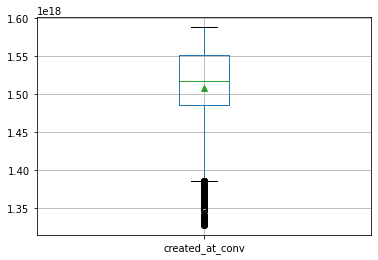

In [ ]:
df_users.boxplot(['created_at_conv'], showmeans=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bfd9fd650>]],
      dtype=object)

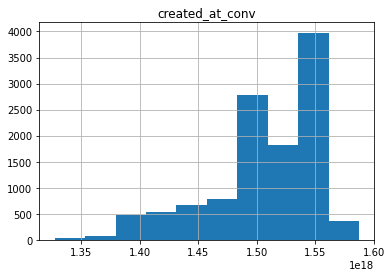

In [ ]:
df_users.hist(['created_at_conv'])

In [ ]:
df_users[np.logical_and(df_users['created_at_conv'] > 1.50e18, df_users['created_at_conv'] < 1.56e18)] # Min: 2017-07-14 05:34:46 Max: 2019-06-08 10:26:46

Users below the 0.001 Quantile (outliers), still have possible created_at values (2012 is plausible, unlike 1960).
If any analyses should be performed on the created_at column we must take into account that there are many outliers.

In [ ]:
df_users[df_users['created_at_conv'] < df_users['created_at_conv'].quantile(0.001)]

,id,name,lang,bot,created_at,statuses_count,created_at_conv
875,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,1328678749000000000
1501,3873101,تاتسو موناكاتا,en,0,2012-04-10 07:28:52,106335,1334042932000000000
1610,887281,Paul Youlten,en,0,2012-03-11 22:25:08,626,1331504708000000000
1966,785080,W H,en,0,2012-02-23 01:08:16,22496,1329959296000000000
3285,1813221,Morgan Johnson,en,0,2012-03-22 23:43:40,20225,1332459820000000000
3878,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,1327370258000000000
6261,1382561,jojoko,en,0,2012-03-18 23:24:35,8236,1332113075000000000
6983,2770511,べン,en,0,2012-03-30 02:31:13,38140,1333074673000000000
7192,806585,Christopher Mahan,en,0,2012-03-03 17:27:49,29997,1330795669000000000
10660,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,1328764884000000000


In [ ]:
df_users['bot'].value_counts()

1    6116
0    5392
Name: bot, dtype: int64

# Language field
There are some mispellings, so we are going to replace the mispelled ones to the correct ones, which are:
- en-gb to en-GB
- zh-tw to zh-TW

There are also two wrong values, 'Select Language...' and 'xx-lc', related to three users in total.
To understand the impact of the possible changes the number of tweets contained in the tweets file have been taken in account. The accounts seem to be active and have a lot of related tweets. The attribute is categorical so this value could be replaced by the mode which is the 'en' language. 
Since there are only three users, to double-check the validity of our choice the relative tweets have been analyzed. The check confirmed that 'en' is the right choice.

In [ ]:
df_users['lang'].value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [ ]:
df_users['lang'].replace({'en-gb':'en-GB','zh-tw':'zh-TW'}, inplace=True)

In [ ]:
df_users['lang'].value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-GB                   54
ru                      42
fr                      36
ja                      33
zh-TW                   20
tr                      14
id                      12
ko                       9
de                       8
nl                       6
ar                       3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [ ]:
df_users[np.logical_or(df_users['lang'] == 'Select Language...', df_users['lang'] == 'xx-lc')]

,id,name,lang,bot,created_at,statuses_count,created_at_conv
4166,2956613720,Leanne Arker,Select Language...,0,2020-01-05 00:09:59,57,1578182999000000000
8666,2904858613,Brooke,Select Language...,0,2019-11-22 05:44:46,85,1574401486000000000
10065,29552151,Chloe,xx-lc,0,2014-04-09 21:36:02,15398,1397079362000000000


Select all tweets that have the user_ids of people who have "Select Language..." and "xx-lc" as language

In [ ]:
ids = df_users[np.logical_or(df_users['lang'] == 'Select Language...', df_users['lang'] == 'xx-lc')].id.values.astype(str)
pd.set_option('display.max_rows',200)
df_tweets[df_tweets['user_id'].isin(ids[2:])]

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
6119,491274532679081984,29552151,0,0,0,0,0,0,2019-07-23 17:32:30,"Spent the majority of my day drawing around, c..."
12218,488693001456463872,29552151,0,0,0,0,0,0,2019-07-16 14:34:25,We all love dem cuddles. http://t.co/fPrcnUfacS
15946,485410906692919297,29552151,0,0,0,0,0,0,2019-07-07 13:12:33,Dog sitting until 8 tonight. Again..
16947,1683542282301364,29552151,0,NaN,0.0,NaN,0.0,NaN,2019-07-16 20:58:50,NaN
17457,7055458923,29552151,NaN,0.0,NaN,0.0,0.0,0,2020-02-27 20:17:18,The chocolate is soooooooooooo amazing.
...,...,...,...,...,...,...,...,...,...,...
13633429,492646759857152000,29552151,0,0,0,0,0,0,2019-07-27 12:25:15,@Cock_Penis Around 4 hopefully...Got to go to ...
13634576,479715963076874241,29552151,0,0,0,0,0,0,2019-06-21 20:02:52,I'd love to have white hair for real though.
13637349,562936922881159168,29552151,0,0,0,0,0,0,2020-02-06 11:33:15,Is there a way to wake up without feeling like...
13640124,481513416465854464,29552151,0,0,0,0,0,0,2019-06-26 19:05:19,...and my nails are obviously being painted bl...


In [ ]:
df_users['lang'].replace({'Select Language...':'en','xx-lc':'en'}, inplace=True)

In [ ]:
df_users['lang'].value_counts()

en       9973
it        906
es        319
pt         65
en-GB      54
ru         42
fr         36
ja         33
zh-TW      20
tr         14
id         12
ko          9
de          8
nl          6
ar          3
da          2
en-AU       1
zh-cn       1
pl          1
el          1
fil         1
sv          1
Name: lang, dtype: int64

# Tweets csv cleaning

## id
In the id column there are only two missing values. Since the column is not meaningful for the analysis phase, the column is dropped.

## user_id 
In the user_id column there are a lot of missing values, wrong values (non numerical ids) and 210778 user ids do not have any correspondance with users file. Nevertheless, these records have been kept because the other columns could be useful for future analyses.

## retweet_count


In [ ]:
df_tweets_single.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712348 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              11712346 non-null  object
 1   user_id         11495314 non-null  object
 2   retweet_count   11275326 non-null  object
 3   reply_count     11064671 non-null  object
 4   favorite_count  11064981 non-null  object
 5   num_hashtags    10655073 non-null  object
 6   num_urls        11063920 non-null  object
 7   num_mentions    10858432 non-null  object
 8   created_at      11712348 non-null  object
 9   text            11182415 non-null  object
dtypes: object(10)
memory usage: 982.9+ MB


In [ ]:
df_tweets_single.drop(columns=['id'], inplace=True)

In [ ]:
df_tweets_single.to_csv('df_tweets_single.csv')

Select records which have both user_id and text values which are null

In [ ]:
df_tweets_single[np.logical_and(df_tweets['user_id'].isnull(), df_tweets['text'].isnull())].info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 56118 entries, 42 to 13664257
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         0 non-null      object
 1   retweet_count   51567 non-null  object
 2   reply_count     25737 non-null  object
 3   favorite_count  50960 non-null  object
 4   num_hashtags    392 non-null    object
 5   num_urls        26107 non-null  object
 6   num_mentions    466 non-null    object
 7   created_at      56118 non-null  object
 8   text            0 non-null      object
dtypes: object(9)
memory usage: 4.3+ MB


Merge users table with tweets table by user_id

In [ ]:
df_users.id = df_users.id.astype(str)
merged = df_tweets_single.merge(df_users, left_on='user_id', right_on='id', how='left')

In [ ]:
df_tweets_single.shape

(11712348, 9)

In [ ]:
merged.shape

(11712348, 16)

Number of `user_id` that have no correspondance in users file.

In [ ]:
len(merged[merged['id'].isnull()].user_id.unique())

210778

Cast retweet_count values in a new column to float (there are number to big for int) and set to -1.0 when there is a value which is not a number

In [ ]:
def to_float(x):
    try:
        return float(x)
    except:
        return -1.0
    
df_tweets_single['retweet_count_conv'] = df_tweets_single.retweet_count.apply(to_float)

In [ ]:
df_tweets_single.drop(columns=['retweet_count'], inplace=True)

In [ ]:
df_tweets_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712348 entries, 0 to 13664695
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   reply_count         object 
 2   favorite_count      object 
 3   num_hashtags        object 
 4   num_urls            object 
 5   num_mentions        object 
 6   created_at          object 
 7   text                object 
 8   retweet_count_conv  float64
dtypes: float64(1), object(8)
memory usage: 893.6+ MB


In [ ]:
droppe = df_tweets_single[np.logical_and(df_tweets_single['retweet_count_conv'] != -1.0, df_tweets_single['retweet_count_conv'] < 1e30)]

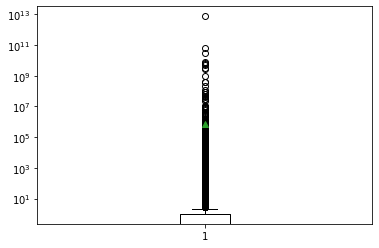

In [ ]:
plt.boxplot(droppe.retweet_count_conv,showmeans=True)
plt.yscale('log')
plt.show()

The boxplot is not informative, so we investigate this field by means of an histogram.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa48d4c290>]],
      dtype=object)

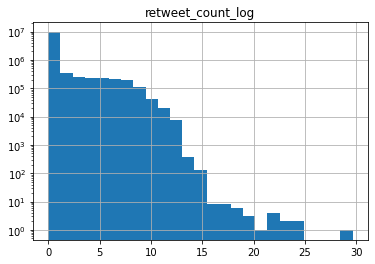

In [ ]:
import math

droppe['retweet_count_log'] = np.log(droppe.retweet_count_conv.values)
droppe['retweet_count_log'] = droppe.retweet_count_log.replace(-np.inf, 0)
n_bins = math.ceil(np.log2(len(droppe['retweet_count_log'])) + 1) #Sturges' rule
droppe.hist('retweet_count_log', bins=n_bins, log=True)

In [ ]:
print("mean: " + str(np.mean(droppe.retweet_count_conv.values)))
print("median: " + str(np.median(droppe.retweet_count_conv.values)))

mean: 697926.974898063
median: 0.0


As it is possible to see the distribution is positively skewed. Considering the statistical indicators, it is clear that the mean is too much influenced by outliers so the median has been taken in account.

In [ ]:
df_tweets_single['retweet_count_conv'].replace({-1.0: 0}, inplace=True)
#df_appoggio[df_appoggio['retweet_count_conv'] < 0].value_counts()

## TODO understand why there are NaN numbers in retweet_count_conv and replace all the wrong values

# Clean strings in retweet counts

Some records have inf as value of retweet_count_conv column, that is because they were too big to be cast. These numbers are probably noise.

In [ ]:
df_tweets_single[df_tweets_single['retweet_count_conv'] > 1e100]

,user_id,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,retweet_count_conv
1606076,2374871490,0.0,0.0,NaN,NaN,NaN,2019-07-06 10:54:48,NaN,2.000000e+134
4383092,521358579,NaN,0.0,NaN,0.0,NaN,2019-10-05 03:46:47,NaN,inf
7410558,2276634303,0.0,0.0,0.0,5zhxou,1,2020-04-15 04:51:01,RT @_RJohnson22_: A Massage Is Well Needed,inf
7626363,413655972,0.0,0.0,NaN,0.0,1,2019-04-17 03:43:32,"RT @BasebaIlDreams: ""She knows exactly what sh...",inf
7695054,2498346724,0.0,NaN,NaN,NaN,NaN,2019-07-03 18:33:42,Cmon Switzerland,inf
8915555,201350011,NaN,NaN,NaN,NaN,NaN,2018-05-05 15:15:05,@EnlajugadaRCN @casaleantonio @jorgebermudezh ...,inf
11248552,e2cmhj4wyg,NaN,33.0,NaN,0.0,NaN,2018-10-29 16:35:30,NaN,inf


In [ ]:
df_tweets_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712348 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   retweet_count       object 
 2   reply_count         object 
 3   favorite_count      object 
 4   num_hashtags        object 
 5   num_urls            object 
 6   num_mentions        object 
 7   created_at          object 
 8   text                object 
 9   retweet_count_conv  float64
dtypes: float64(1), object(9)
memory usage: 982.9+ MB


Drop all records that have inf value in the retweet_count field

In [ ]:
df_tweets_single[df_tweets_single['retweet_count_conv'] == np.inf]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,retweet_count_conv
4383092,521358579,713e431,NaN,0.0,NaN,0.0,NaN,2019-10-05 03:46:47,NaN,inf
7410558,2276634303,4e757,0.0,0.0,0.0,5zhxou,1,2020-04-15 04:51:01,RT @_RJohnson22_: A Massage Is Well Needed,inf
7626363,413655972,3e7323,0.0,0.0,NaN,0.0,1,2019-04-17 03:43:32,"RT @BasebaIlDreams: ""She knows exactly what sh...",inf
7695054,2498346724,6e743,0.0,NaN,NaN,NaN,NaN,2019-07-03 18:33:42,Cmon Switzerland,inf
8915555,201350011,inf,NaN,NaN,NaN,NaN,NaN,2018-05-05 15:15:05,@EnlajugadaRCN @casaleantonio @jorgebermudezh ...,inf
11248552,e2cmhj4wyg,1e531,NaN,33.0,NaN,0.0,NaN,2018-10-29 16:35:30,NaN,inf


In [ ]:
df_tweets_single.retweet_count_conv.max()

inf

In [ ]:
df_tweets_single.drop(df_tweets_single[df_tweets_single['retweet_count_conv'] == np.inf].index, inplace=True)
df_tweets_single.retweet_count_conv.max()

2e+134

In [ ]:
import math

# Clean strings in reply count

In [ ]:
df_tweets_single['reply_count'] = df_tweets_single.reply_count.apply(to_float)

In [ ]:
df_tweets_single['reply_count'].max()

inf

In [ ]:
df_tweets_single.drop(df_tweets_single[df_tweets_single['reply_count'] == np.inf].index, inplace=True)
df_tweets_single.reply_count.max()

2e+110

In [ ]:
mean = df_tweets_single[df_tweets_single['reply_count'] != -1.0].reply_count.mean()
median = df_tweets_single[df_tweets_single['reply_count'] != -1.0].reply_count.median()

In [ ]:
median

0.0

In [ ]:
df_tweets_single['reply_count'].replace({-1.0: median}, inplace=True)

# Clean strings in favorite count

In [ ]:
df_tweets_single['favorite_count'] = df_tweets_single.favorite_count.apply(to_float)

In [ ]:
df_tweets_single.drop(df_tweets_single[df_tweets_single['favorite_count'] == np.inf].index, inplace=True)
df_tweets_single.favorite_count.max()

7e+211

In [ ]:
mean = df_tweets_single[df_tweets_single['favorite_count'] != -1.0].favorite_count.mean()
median = df_tweets_single[df_tweets_single['favorite_count'] != -1.0].favorite_count.median()

In [ ]:
df_tweets_single['favorite_count'].replace({-1.0: median}, inplace=True)

# Clean strings in num_hastags

In [ ]:
df_tweets_single['num_hashtags'] = df_tweets_single.num_hashtags.apply(to_float)

df_tweets_single.drop(df_tweets_single[df_tweets_single['num_hashtags'] == np.inf].index, inplace=True)
df_tweets_single.num_hashtags.max()

7e+153

In [ ]:
mean = df_tweets_single[df_tweets_single['num_hashtags'] != -1.0].num_hashtags.mean()
median = df_tweets_single[df_tweets_single['num_hashtags'] != -1.0].num_hashtags.median()

In [ ]:
df_tweets_single['num_hashtags'].replace({-1.0: median}, inplace=True)

# Clean strings in num_urls

In [ ]:
df_tweets_single['num_urls'] = df_tweets_single.num_urls.apply(to_float)

df_tweets_single.drop(df_tweets_single[df_tweets_single['num_urls'] == np.inf].index, inplace=True)
df_tweets_single.num_urls.max()

1e+210

In [ ]:
mean = df_tweets_single[df_tweets_single['num_urls'] != -1.0].num_urls.mean()
median = df_tweets_single[df_tweets_single['num_urls'] != -1.0].num_urls.median()

In [ ]:
median

0.0

In [ ]:
df_tweets_single['num_urls'].replace({-1.0: median}, inplace=True)

# Clean strings in num mentions

In [ ]:
df_tweets_single['num_mentions'] = df_tweets_single.num_mentions.apply(to_float)

df_tweets_single.drop(df_tweets_single[df_tweets_single['num_mentions'] == np.inf].index, inplace=True)
df_tweets_single.num_mentions.max()

6e+97

In [ ]:
mean = df_tweets_single[df_tweets_single['num_mentions'] != -1.0].num_mentions.mean()
median = df_tweets_single[df_tweets_single['num_mentions'] != -1.0].num_mentions.median()

In [ ]:
median

0.0

In [ ]:
df_tweets_single['num_mentions'].replace({-1.0: median}, inplace=True)

Retweet_count_conv => droppati i valori inf
Reply_count => convertito e droppato i valori inf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


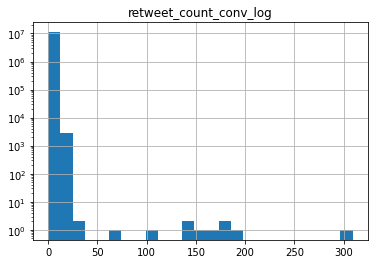

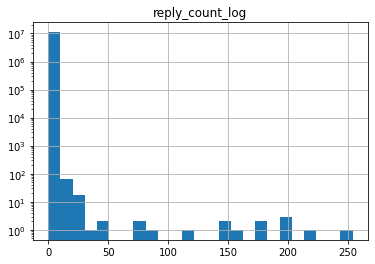

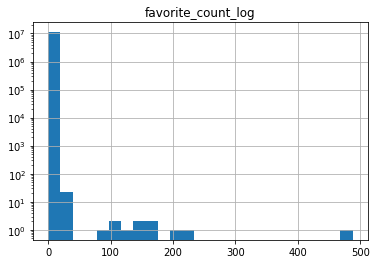

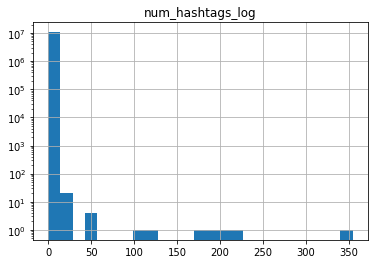

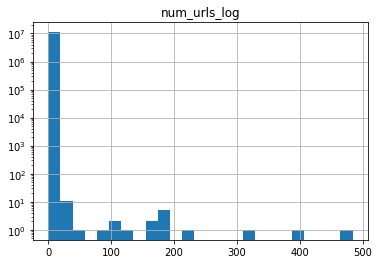

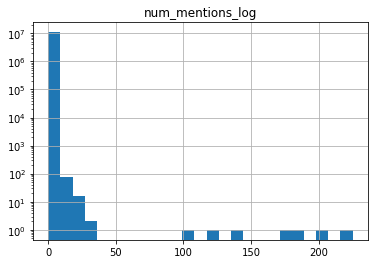

In [ ]:
for attr in ['retweet_count_conv', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']:
  attr_log = pd.DataFrame()
  attr_log[attr + '_log'] = np.log(df_tweets_single[attr].values)
  attr_log[attr + '_log'] = attr_log[attr + '_log'].replace(-np.inf, 0)
  #attr_log

  n_bins = math.ceil(np.log2(len(attr_log[attr + '_log'])) + 1) #Sturges' rule
  attr_log.hist(attr + '_log', bins = n_bins, log=True)

In [ ]:
df_tweets_single = pd.read_csv('df_tweets_single.csv')

ParserError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


continue


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: ignored

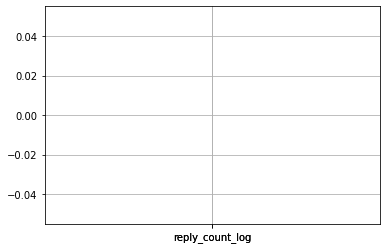

In [ ]:
for attr in ['retweet_count_conv', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']:
  attr_log = pd.DataFrame()
  attr_log[attr + '_log'] = np.log(df_tweets_single[attr].values)
  attr_log[attr + '_log'] = attr_log[attr + '_log'].replace(-np.inf, 0)
  #attr_log
  attr_log[attr+'_log'] = attr_log[attr_log[attr+'_log'] < attr_log[attr+'_log'].quantile(0.001)]
  attr_log.boxplot(attr+'_log', showmeans=True)
  input('continue')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


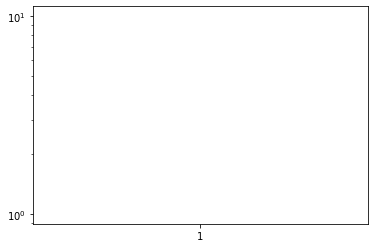

In [ ]:
attr = 'retweet_count_conv'
attr_log = pd.DataFrame()
attr_log[attr + '_log'] = np.log(df_tweets_single[attr].values)
attr_log[attr + '_log'] = attr_log[attr + '_log'].replace(-np.inf, 0)
#attr_log
#attr_log[attr+'_log'] = attr_log[attr_log[attr+'_log'] < attr_log[attr+'_log'].quantile(1.00)]
#attr_log[attr_log[attr+'_log'] < 2].boxplot(attr+'_log', showmeans=True)


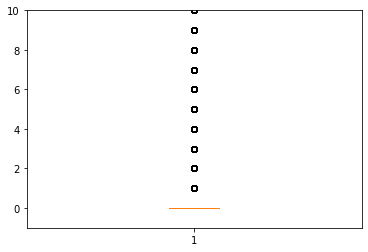

In [ ]:
#df_tweets_single[df_tweets_single[attr] < 5].boxplot(attr, showmeans=True)
attr = df_tweets_single[df_tweets_single['favorite_count'] < 1e10]
plt.boxplot(attr.favorite_count)
#plt.yscale('log')
plt.ylim(-1, 1e1)
plt.show()

In [ ]:
df_tweets_single.reply_count.min()

0.0